# Simulate current injections into one or more neurons in a network

First we define the network. Generating the network is relatively fast, so you can generate a larger network. Simulating the full network is slower, so by default only the neurons receiving a current injection, and their post synaptic targets are simulated.

In the cell below we define the number of neurons we want, and the volume we place them inside.

In [1]:
import os

n_dSPN = 4
n_iSPN = 4
n_FS = 4
n_LTS = 1
n_ChIN = 0


network_path = os.path.join("networks","pair_recording_simulation")
volume_type="cube"
side_len = 100e-6

Snudda init writes the ```network-config.json``` file.

In [2]:
from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=1337)
cnc.define_striatum(num_dSPN=n_dSPN, num_iSPN=n_iSPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                    volume_type="cube", side_len=side_len)
cnc.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002], [-0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [-0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([0.0009], [-0.0001], [-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [-0.0001], [3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [0.0001], [-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [0.0001], [3.e-05]) = [1.72360142e-23]
Adding neurons: LTS from

Snudda Place, Detect and Prune. Here the neurons are placed in the network, synapse touch detection is done, and finally pruning of the putative synapses.

In [3]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [4]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 21/80 (13 neurons)
Processing hyper voxel : 16/80 (13 neurons)
Processing hyper voxel : 17/80 (13 neurons)
Processing hyper voxel : 20/80 (13 neurons)
Processing hyper voxel : 33/80 (12 neurons)
Processing hyper voxel : 37/80 (11 neurons)
Processing hyper voxel : 36/80 (9 neurons)
Processing hyper voxel : 32/80 (9 neurons)
Processing hyper voxel : 0/80 (4 neurons)
Processing hyper voxel : 5/80 (4 neurons)
Processing hyper voxel : 1/80 (4 neurons)
Processing hyper voxel : 22/80 (2 neurons)
Processing hyper voxel : 34/80 (2 neurons)
Processing hyper voxel : 4/80 (2 neurons)
Processing hyper voxel : 18/80 (2 neurons)
Processing hyper voxel : 38/80 (1 neurons)
Processing hyper voxel : 25/80 (1 neurons)
Processing hyper voxel : 6/80 (1 neurons)
Processing hyper voxel : 53/80 (1 neurons)


In [5]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()
spr = None

Read 2615 out of total 2615 synapses
Read 68 out of total 68 gapJunctions


We compile the neuron mechanisms for the simulation. Here we just use the default mechanisms provided.

In [6]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks
Mod files: "../../snudda/data/neurons/mechanisms/bk_ch.mod" "../../snudda/data/neurons/mechanisms/bk_fs.mod" "../../snudda/data/neurons/mechanisms/bk_ms.mod" "../../snudda/data/neurons/mechanisms/ca_ch.mod" "../../snudda/data/neurons/mechanisms/cadyn_fs.mod" "../../snudda/data/neurons/mechanisms/cadyn_ms.mod" "../../snudda/data/neurons/mechanisms/cal12_ms.mod" "../../snudda/data/neurons/mechanisms/cal13_ms.mod" "../../snudda/data/neurons/mechanisms/cal_ch.mod" "../../snudda/data/neurons/mechanisms/caldyn_ms.mod" "../../snudda/data/neurons/mechanisms/can_fs.mod" "../../snudda/data/neurons/mechanisms/can_ms.mod" "../../snudda/data/neurons/mechanisms/cap_ch.mod" "../../snudda/data/neurons/mechanisms/caq_fs.mod" "../../snudda/data/neurons/mechanisms/caq_ms.mod" "../../snudda/data/neurons/mechanisms/car_fs.mod" "../../snudda/data/neurons/mechanisms/car_ms.mod" "../../snudda/data/neurons/mechanisms/cat32_ms.mod" "../../snudda/data/neurons/mechanisms

Run the NEURON simulation of the network. The setup is defined in the [experiment-config-6.json](../../snudda/data/experiment_config/experiment-config-6.json) file.

In [7]:
from snudda.simulate.pair_recording import PairRecording 
experiment_config_file = os.path.join("..","..", "snudda", "data", "experiment_config", "experiment-config-6.json")
pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file)

numprocs=1
Loading 13 neurons with 270 synapses and 41 gap junctions


/home/hjorth/.local/lib/python3.9/site-packages/bluepyopt/ephys/simulators.py:73: UserWarning: Unable to find Neuron hoc shared library in /usr/local/lib/python/neuron, not disabling banner
  warnings.warn('Unable to find Neuron hoc shared library in %s, '


Setting tmGabaA reversal potential to -40.0 mV


In [8]:
pr.run()

Running simulation for 4.0 s
1% done. Elapsed: 0.9 s, estimated time left: 86.6 s
Simulation run time: 86.3 s
Writing network output to networks/pair_recording_simulation/simulation/network-output-6.txt
Saving voltage data...
Sorting spikes
Saving spike data...


## Plot the results

First we start with an overview trace of all the neurons that receive a current injection, and their post synaptic targets.

Loading 13 neurons with 270 synapses and 41 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-6.txt
Plotting traces: [10, 11, 4]
Plotted 3 traces (total 3)


<IPython.core.display.Javascript object>


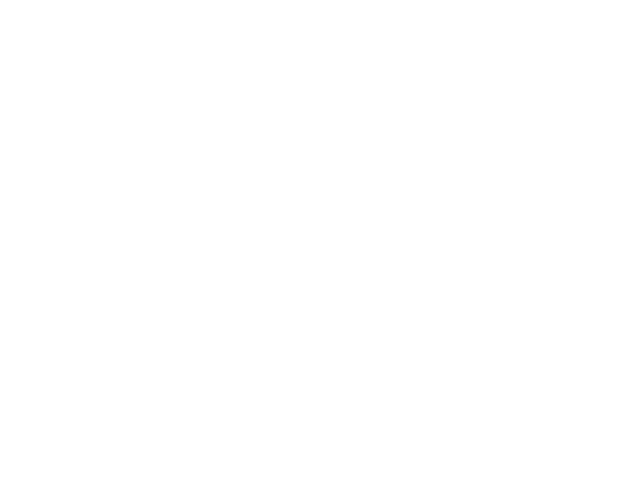

Saving to figure Network-voltage-trace-6-iSPN-colour.pdf


In [9]:
%matplotlib notebook
pr.plot_trace_overview()

We can also plot the individual post synaptic traces, with the current pulses marked.

Loading 13 neurons with 270 synapses and 41 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-6.txt
!!! Excluding first 0.25 s from the plot
Plotting traces: [10]
Plotted 1 traces (total 3)


<IPython.core.display.Javascript object>


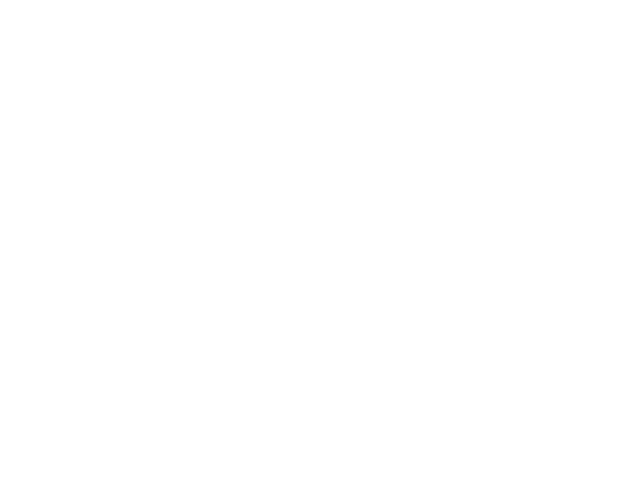

Saving to figure Current-injection-pre-4-post-10.pdf
Loading 13 neurons with 270 synapses and 41 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-6.txt
!!! Excluding first 0.25 s from the plot
Plotting traces: [11]
Plotted 1 traces (total 3)


<IPython.core.display.Javascript object>


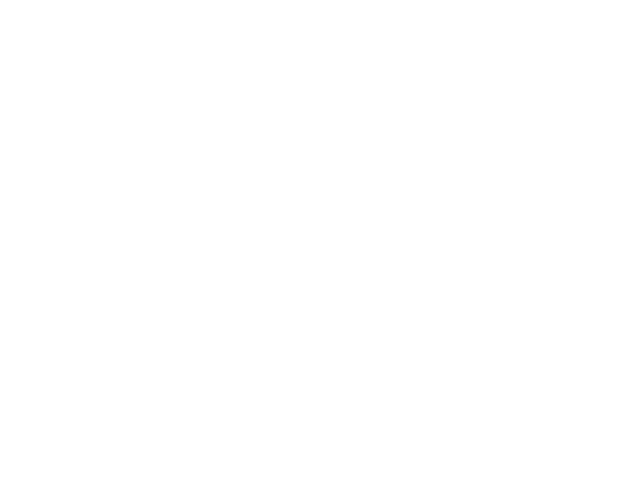

Saving to figure Current-injection-pre-4-post-11.pdf


In [10]:
%matplotlib notebook
pr.plot_traces()

The code below shows how you can use PlotTraces to load the voltage traces and plot the data yourself if you do not have the PairRecording object available anymore.

In [11]:
%matplotlib notebook
from snudda.plotting import PlotTraces
pt = PlotTraces(file_name=os.path.join(network_path,"simulation","network-output-6.txt"),
                network_file=os.path.join(network_path, "network-synapses.hdf5"))

Loading 13 neurons with 270 synapses and 41 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-6.txt


Plotting traces: [10, 11, 4]
Plotted 3 traces (total 3)


<IPython.core.display.Javascript object>


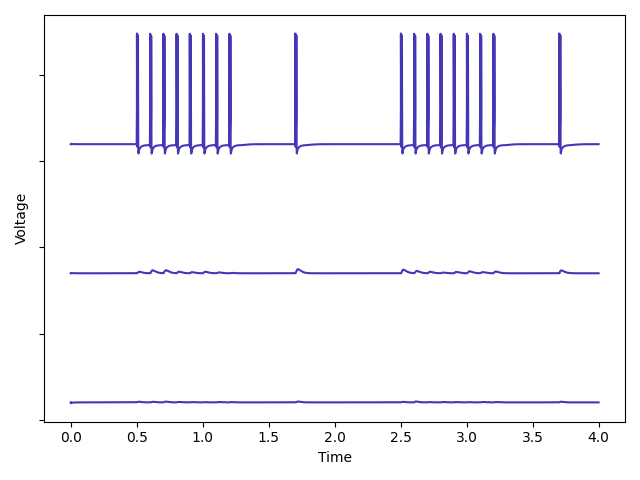

Saving to figure Network-voltage-trace-6-iSPN-colour.pdf


<IPython.core.display.Javascript object>


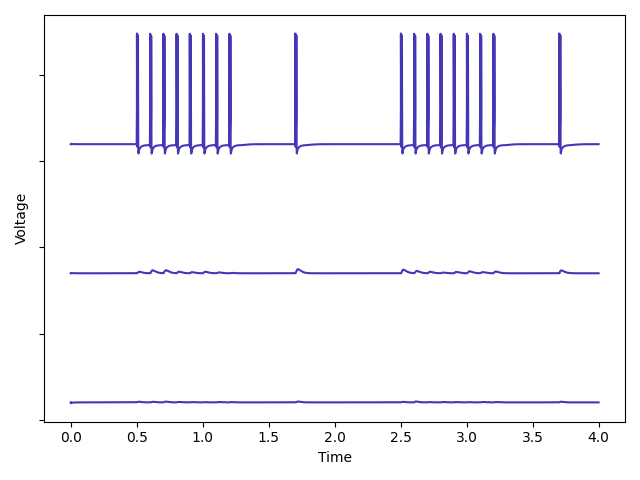

In [12]:
pt.plot_traces([x for x in pt.voltage])

Plotting traces: [11]
Plotted 1 traces (total 3)


<IPython.core.display.Javascript object>


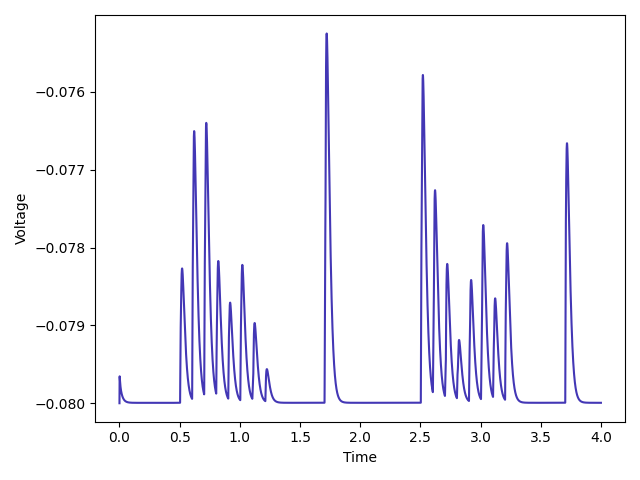

Saving to figure Network-voltage-trace-6-iSPN-colour.pdf


<IPython.core.display.Javascript object>


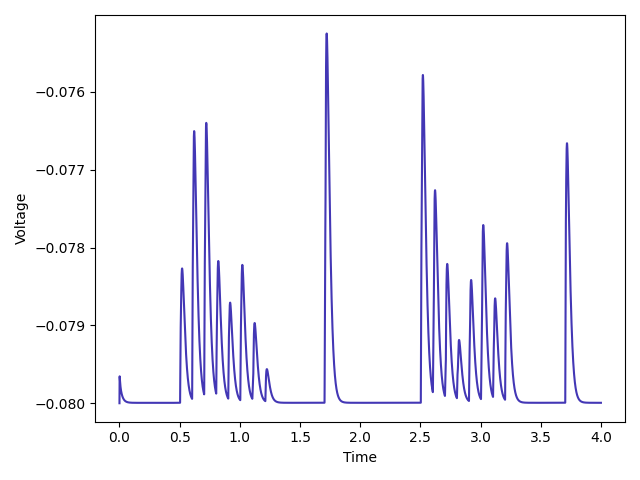

In [13]:
pt.plot_traces([11], offset=0)

Plotting traces: [10]
Plotted 1 traces (total 3)


<IPython.core.display.Javascript object>


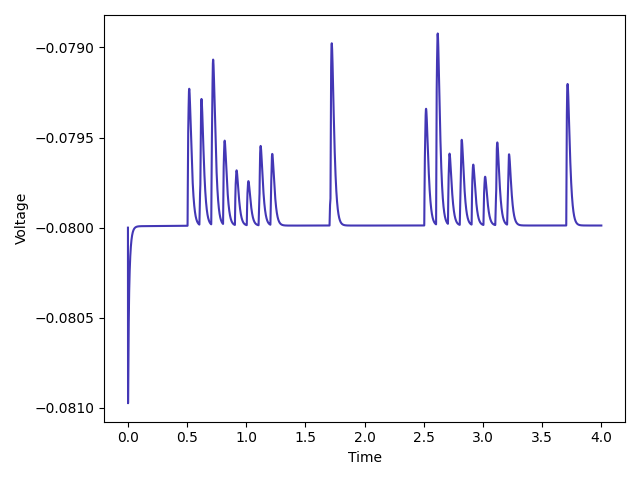

Saving to figure Network-voltage-trace-6-iSPN-colour.pdf


<IPython.core.display.Javascript object>


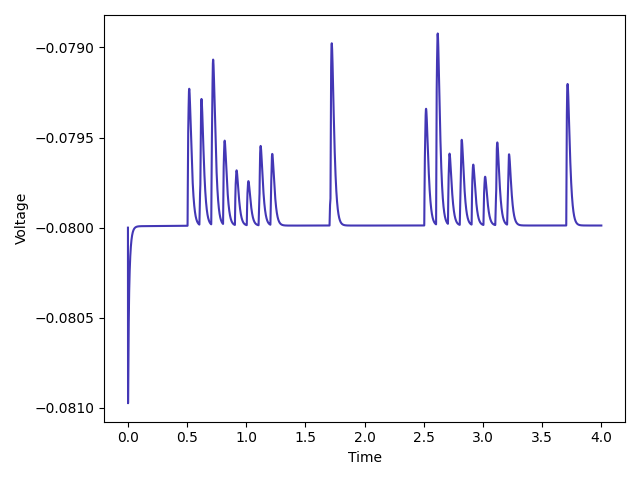

In [19]:
pt.plot_traces([10], offset=0)

Plotting traces: [10, 11, 4]
Plotted 3 traces (total 3)


<IPython.core.display.Javascript object>


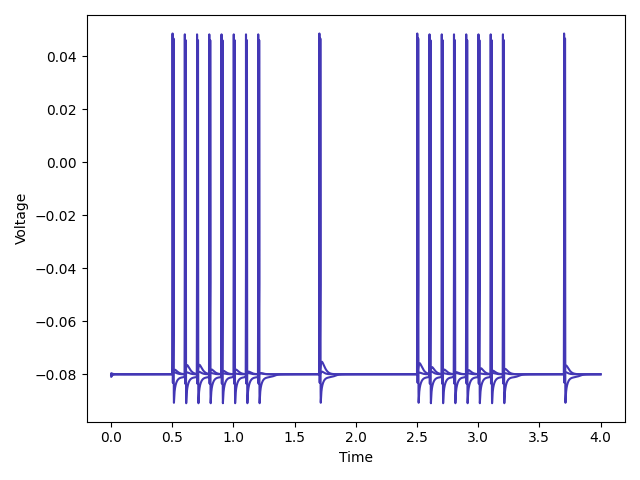

Saving to figure Network-voltage-trace-6-iSPN-colour.pdf


<IPython.core.display.Javascript object>


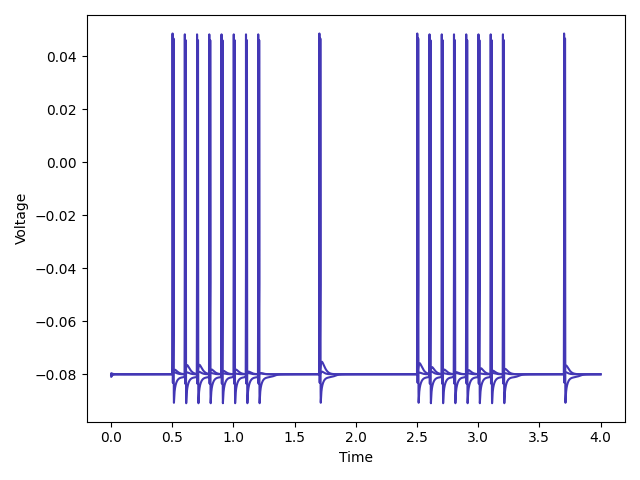

In [15]:
pt.plot_traces([x for x in pt.voltage], offset=0)

<IPython.core.display.Javascript object>


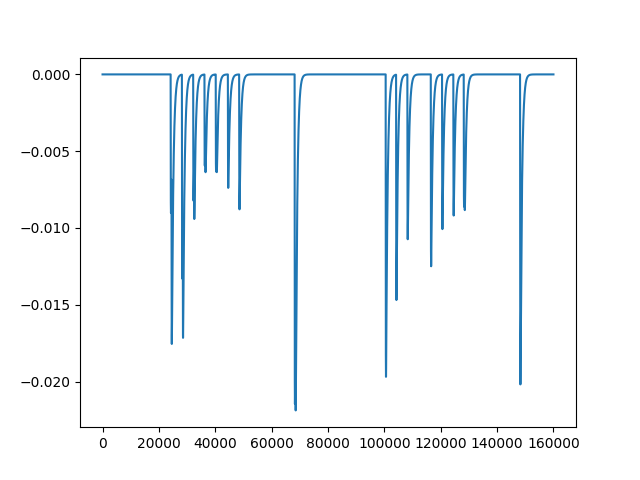

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([x for x in pr.synapse_currents[0][2]])
plt.show()

In [17]:
pr.synapse_currents[0][2]

Vector[14690]

In [18]:
pr.neurons[4].name

'iSPN_2'